In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler, PowerTransformer, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [124]:
df = pd.read_csv('cleaned_data.csv')

In [125]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'order_time_hour',
       'order_time_of_day', 'pickup_time', 'distance', 'distance_type'],
      dtype='object')

In [126]:
# droping columns not required for model training

columns_to_drop=['rider_id',
                 'restaurant_latitude','restaurant_longitude',
                 'delivery_latitude','delivery_longitude',
                 'order_date','order_time_hour','order_day']

df.drop(columns=columns_to_drop,inplace=True)

In [127]:
df.columns

Index(['age', 'ratings', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_month',
       'order_day_of_week', 'is_weekend', 'order_time_of_day', 'pickup_time',
       'distance', 'distance_type'],
      dtype='object')

In [128]:
# checking for missing values

df.isna().sum()

,0
age,1854
ratings,1908
weather,525
traffic,510
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,993
festival,228
city_type,1198


In [129]:
# checking for duplicates

df.duplicated().sum()

np.int64(0)

<Axes: >

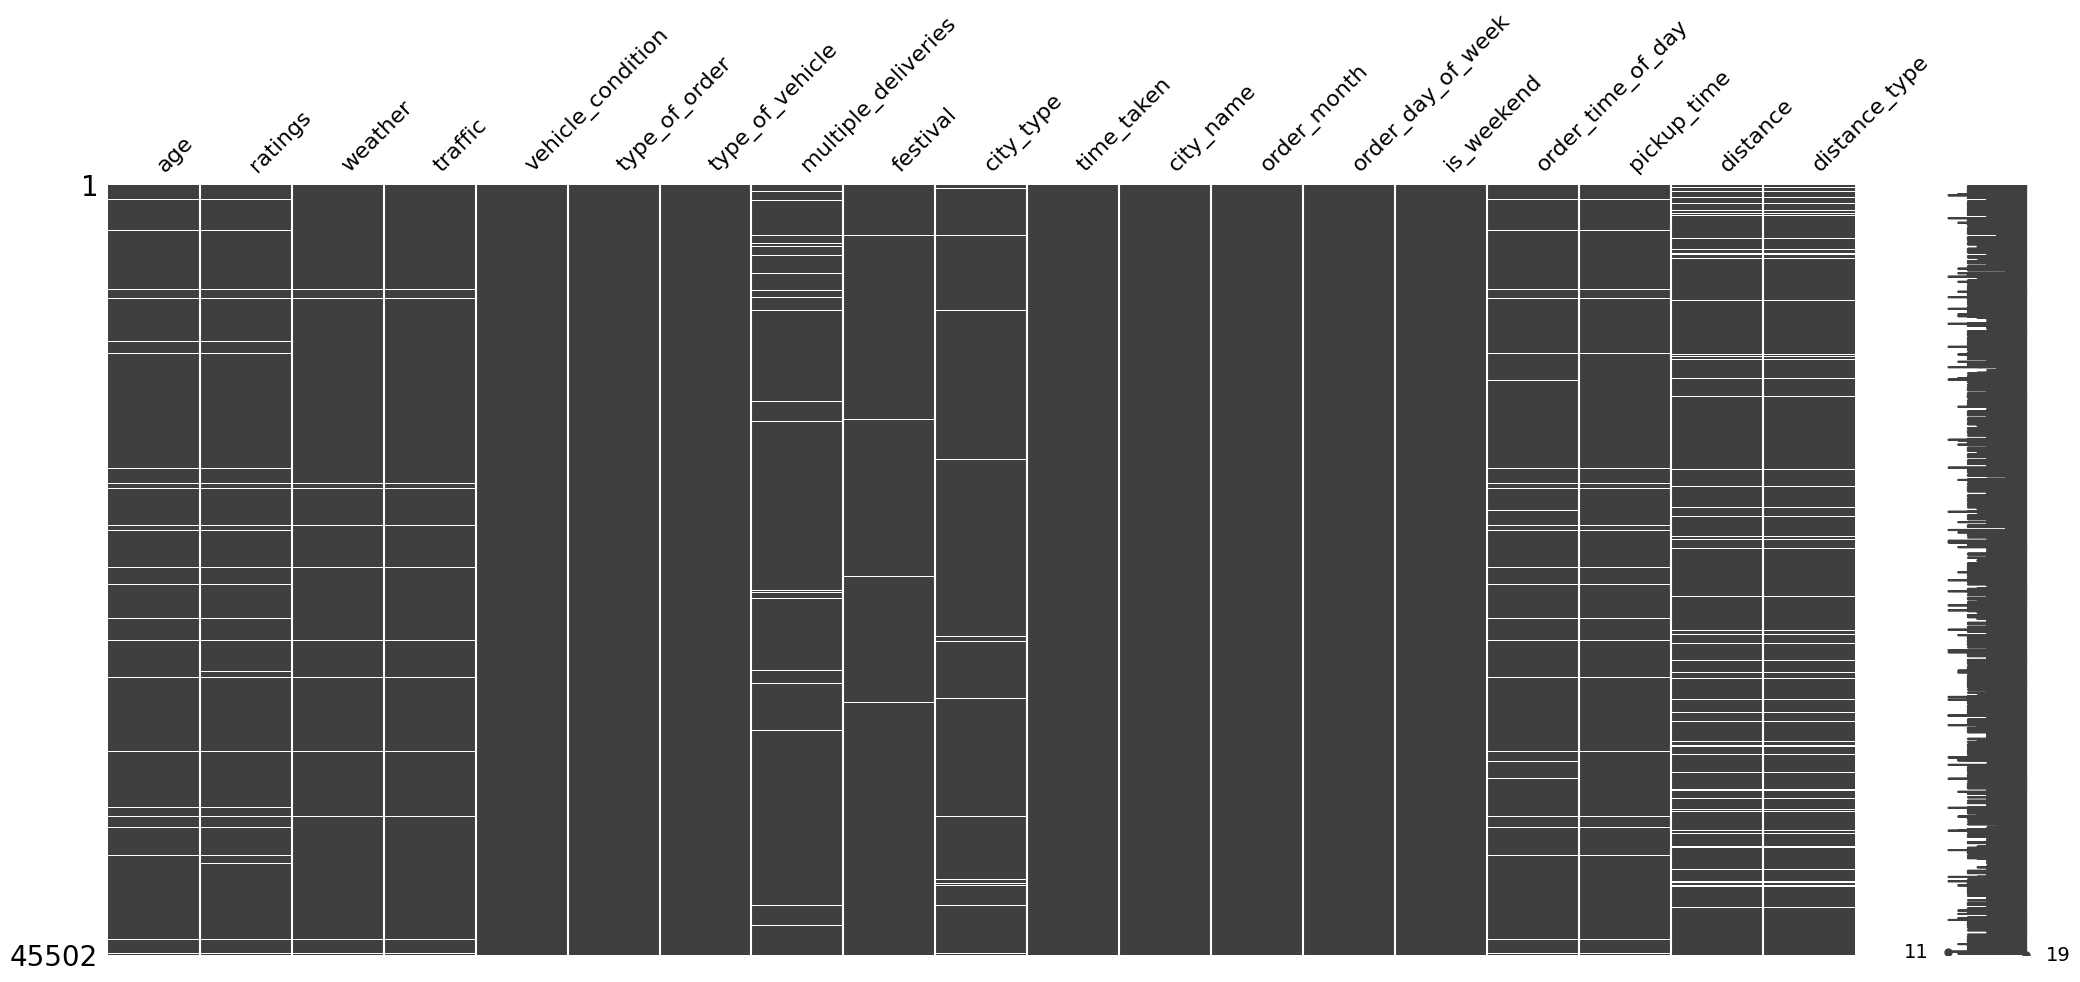

In [130]:
import missingno as msno

msno.matrix(df)

In [131]:
# columns that have missing values

missing_columns=(
    df.isna()
    .any(axis=0)
    .loc[lambda x: x == True]
    .index
)

In [132]:
missing_columns

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'order_time_of_day', 'pickup_time', 'distance',
       'distance_type'],
      dtype='object')

# **Data Preparation**

In [133]:
temp_df=df.copy().dropna()

In [134]:
X=temp_df.drop(columns=['time_taken'])
y=temp_df['time_taken']

X

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,city_name,order_month,order_day_of_week,is_weekend,order_time_of_day,pickup_time,distance,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,INDO,3,saturday,1,morning,15.0,3.025149,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,BANG,3,friday,0,evening,5.0,20.183530,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,BANG,3,saturday,1,morning,15.0,1.552758,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,COIMB,4,tuesday,0,evening,10.0,7.790401,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,CHEN,3,saturday,1,afternoon,15.0,6.210138,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45496,35.0,4.2,windy,jam,2,drinks,motorcycle,1.0,no,metropolitian,RANCHI,3,tuesday,0,night,10.0,16.600272,very_long
45497,30.0,4.8,windy,high,1,meal,motorcycle,0.0,no,metropolitian,JAP,3,thursday,0,morning,10.0,1.489846,short
45499,30.0,4.9,cloudy,low,1,drinks,scooter,0.0,no,metropolitian,CHEN,3,friday,0,night,15.0,4.657195,short
45500,20.0,4.7,cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,COIMB,3,monday,0,afternoon,5.0,6.232393,medium


In [135]:
y

,time_taken
0,24
1,33
2,26
3,21
4,30
...,...
45496,33
45497,32
45499,16
45500,26


In [136]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [137]:
print('The size of the Training Data is: ',X_train.shape)
print('The size of the Testing Data is: ',X_test.shape)

The size of the Training Data is:  (30156, 18)
The size of the Testing Data is:  (7539, 18)


In [138]:
X_train.isna().sum().rename('missing count')

,missing count
age,0
ratings,0
weather,0
traffic,0
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,0
festival,0
city_type,0


In [139]:
X_train.shape[1]

18

In [140]:
# basic Preprocessing

num_cols = ["age","ratings","pickup_time","distance"]

nominal_cat_cols = ['weather','type_of_order',
                    'type_of_vehicle',"festival",
                    "city_type","city_name","order_month",
                    "order_day_of_week",
                    "is_weekend",
                    "order_time_of_day"]

ordinal_cat_cols = ["traffic","distance_type"]

In [141]:
for col in ordinal_cat_cols:
    print(f'{col}: {df[col].unique()}')

traffic: ['high' 'jam' 'low' 'medium' nan]
distance_type: ['short' 'very_long' 'medium' 'long' nan]


In [142]:
# generate order for ordinal encoding

traffic_order=['low','medium','high','jam']

distance_type_order=['short','medium','long','very_long']

In [143]:
# build a preprocessor

preprocessor = ColumnTransformer(transformers=[
    ("scale", MinMaxScaler(), num_cols),
    ("nominal_encode", OneHotEncoder(drop="first",handle_unknown="ignore",sparse_output=False), nominal_cat_cols),
    ("ordinal_encode", OrdinalEncoder(categories=[traffic_order,distance_type_order]), ordinal_cat_cols)
],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)

preprocessor.set_output(transform="pandas")

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time', 'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type', 'city_name',
                                  'order_month', 'order_day_of_week',
                                  'is_weekend', 'order_time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']]),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [144]:
# tranform the Data

X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)

X_train_trans

,age,ratings,pickup_time,distance,weather_fog,weather_sandstorms,weather_stormy,weather_sunny,weather_windy,type_of_order_drinks,...,order_day_of_week_tuesday,order_day_of_week_wednesday,is_weekend_1,order_time_of_day_evening,order_time_of_day_morning,order_time_of_day_night,traffic,distance_type,vehicle_condition,multiple_deliveries
8708,0.473684,0.56,1.0,0.404165,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,0,2.0
25198,1.000000,0.76,0.0,0.154044,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1.0
34049,0.473684,0.80,0.5,0.002461,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1,0.0
25987,1.000000,0.92,1.0,0.460411,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0,1.0
37121,0.526316,0.76,0.5,0.243676,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20239,0.578947,0.92,0.5,0.451895,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,3.0,2.0,0,0.0
7590,0.052632,1.00,1.0,0.612270,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,1,1.0
13610,0.526316,0.92,0.0,0.322877,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,0.0
1045,0.947368,0.96,0.5,0.004486,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,1.0


The scale factor lambda is:  [0.32446096]


<Axes: ylabel='Count'>

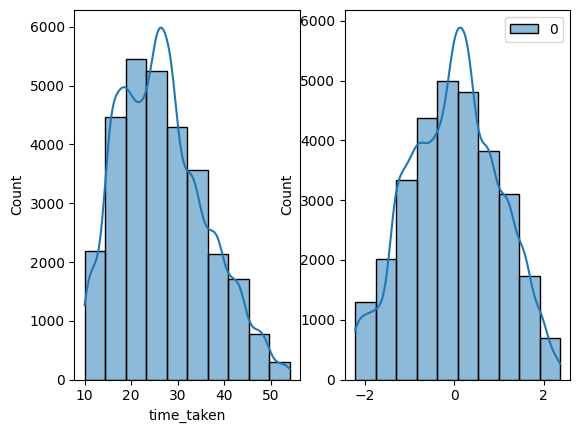

In [145]:
# transform target Column

pt=PowerTransformer(method='yeo-johnson')
y_train_pt=pt.fit_transform(y_train.values.reshape(-1,1))
print('The scale factor lambda is: ',pt.lambdas_)
fig, axs = plt.subplots(1, 2)
sns.histplot(y_train,ax=axs[0],bins=10,kde=True)
sns.histplot(y_train_pt,ax=axs[1],bins=10,kde=True)

# Train Initial Base-Line Model

In [146]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X_train_trans,y_train_pt)

LinearRegression()

In [147]:
# get the Prediction

y_pred_train=lin_reg.predict(X_train_trans)
y_pred_test=lin_reg.predict(X_test_trans)

In [148]:
# get the actual Prediction value

y_pred_train_actual=pt.inverse_transform(y_pred_train)
y_pred_test_actual=pt.inverse_transform(y_pred_test)

In [149]:
from sklearn.metrics import r2_score,mean_absolute_error

print(f'The Train Error is {mean_absolute_error(y_train,y_pred_train_actual):.2f} minutes')
print(f'The Test Error is {mean_absolute_error(y_test,y_pred_test_actual):.2f} minutes')

The Train Error is 4.70 minutes
The Test Error is 4.69 minutes


In [150]:
print(f"The train r2 score is {r2_score(y_train,y_pred_train_actual):.2f}")
print(f"The test r2 score is {r2_score(y_test,y_pred_test_actual):.2f}")

The train r2 score is 0.60
The test r2 score is 0.60


# Impute Missing Values

In [151]:
temp_df = df.copy()

In [152]:
X = temp_df.drop(columns='time_taken')
y = temp_df['time_taken']

X

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,city_name,order_month,order_day_of_week,is_weekend,order_time_of_day,pickup_time,distance,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,INDO,3,saturday,1,morning,15.0,3.025149,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,BANG,3,friday,0,evening,5.0,20.183530,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,BANG,3,saturday,1,morning,15.0,1.552758,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,COIMB,4,tuesday,0,evening,10.0,7.790401,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,CHEN,3,saturday,1,afternoon,15.0,6.210138,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,30.0,4.8,windy,high,1,meal,motorcycle,0.0,no,metropolitian,JAP,3,thursday,0,morning,10.0,1.489846,short
45498,21.0,4.6,windy,jam,0,buffet,motorcycle,1.0,no,metropolitian,AGR,2,wednesday,0,evening,15.0,NaN,NaN
45499,30.0,4.9,cloudy,low,1,drinks,scooter,0.0,no,metropolitian,CHEN,3,friday,0,night,15.0,4.657195,short
45500,20.0,4.7,cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,COIMB,3,monday,0,afternoon,5.0,6.232393,medium


In [153]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [154]:
# missing values in train data

X_train.isna().sum()

,0
age,1470
ratings,1510
weather,421
traffic,407
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,795
festival,188
city_type,968


In [155]:
# tranform the target column

pt=PowerTransformer(method='yeo-johnson')
y_train_pt=pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt=pt.transform(y_test.values.reshape(-1,1))

In [156]:
missing_columns

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'order_time_of_day', 'pickup_time', 'distance',
       'distance_type'],
      dtype='object')

In [157]:
# percentage of rows in data having missing values

(
    X_train.
    isna().
    any(axis=1)
    .mean()
    .round(2) * 100
)

np.float64(17.0)

# Age

In [158]:
X_train['age'].describe()

,age
count,34931.000000
mean,29.569551
std,5.752869
min,20.000000
25%,25.000000
50%,30.000000
75%,35.000000
max,39.000000


In [159]:
# mssing values in the column

X_train['age'].isna().sum()

np.int64(1470)

In [160]:
age_median=X_train['age'].median()

**Avg and Median values are similar, impute the age column with median value**

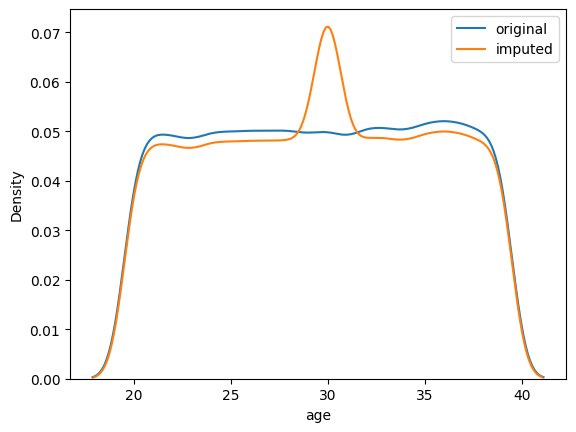

In [161]:
# plot the kde plot

sns.kdeplot(X_train['age'],label="original")
sns.kdeplot(X_train['age'].fillna(age_median),label="imputed")
plt.legend()

**Observations:**



1.   change the distribution of the age column
2.   use advanced imputation techinique like KNN Imputer



# Ratings

In [162]:
X_train['ratings'].describe()

,ratings
count,34891.000000
mean,4.635058
std,0.314049
min,2.500000
25%,4.500000
50%,4.700000
75%,4.900000
max,5.000000


In [163]:
# missing values

X_train['ratings'].isna().sum()

np.int64(1510)

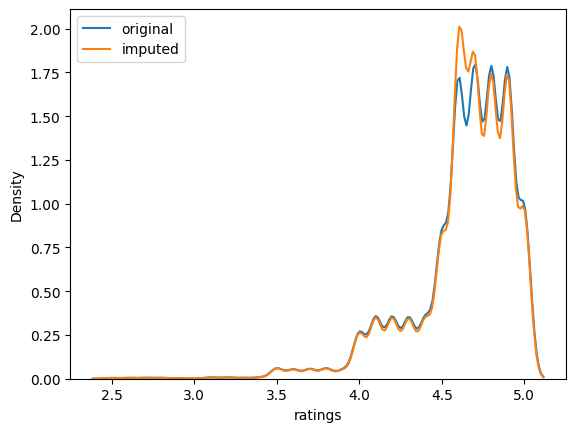

In [164]:
# avg rating

ratings_mean = X_train['ratings'].mean()

# fill and plot kdeplot

sns.kdeplot(X_train['ratings'],label="original")
sns.kdeplot(X_train['ratings'].fillna(ratings_mean),label="imputed")
plt.legend()

# Weather

In [165]:
# value counts

X_train['weather'].value_counts()

,count
weather,
fog,6160
stormy,6051
cloudy,6033
sandstorms,5958
windy,5928
sunny,5850


In [166]:
X_train['weather'].isna().sum()

np.int64(421)

<Axes: xlabel='weather', ylabel='count'>

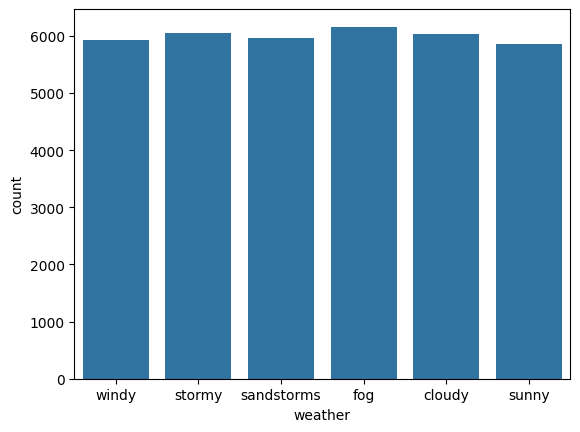

In [167]:
sns.countplot(x=X_train['weather'])

**No Dominant Category to Impute From**

In [168]:
missing_weather = MissingIndicator()
missing_weather.set_output(transform='pandas')
indicator_df = missing_weather.fit_transform(X_train[['weather']])

In [169]:
pd.concat([X_train['weather'],indicator_df],axis=1)

,weather,missingindicator_weather
11029,windy,False
15665,windy,False
14475,stormy,False
29199,windy,False
22514,sandstorms,False
...,...,...
11284,sandstorms,False
44732,cloudy,False
38158,fog,False
860,windy,False


# Traffic

In [170]:
X_train['traffic'].value_counts()

,count
traffic,
low,12323
jam,11320
medium,8773
high,3578


In [171]:
X_train['traffic'].isna().sum()

np.int64(407)

<Axes: xlabel='traffic', ylabel='count'>

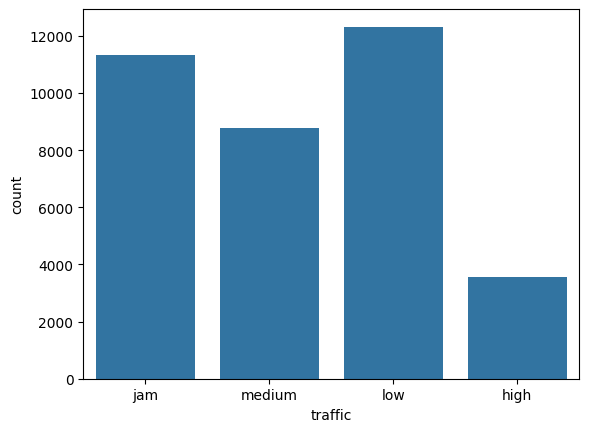

In [172]:
sns.countplot(x=X_train['traffic'])

**No Dominant Category**

In [173]:
missing_columns

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'order_time_of_day', 'pickup_time', 'distance',
       'distance_type'],
      dtype='object')

# Multiple Deliveries

In [174]:
X_train['multiple_deliveries'].value_counts()

,count
multiple_deliveries,
1.0,22487
0.0,11252
2.0,1599
3.0,268


In [175]:
X_train['multiple_deliveries'].isna().sum()

np.int64(795)

<Axes: xlabel='multiple_deliveries', ylabel='count'>

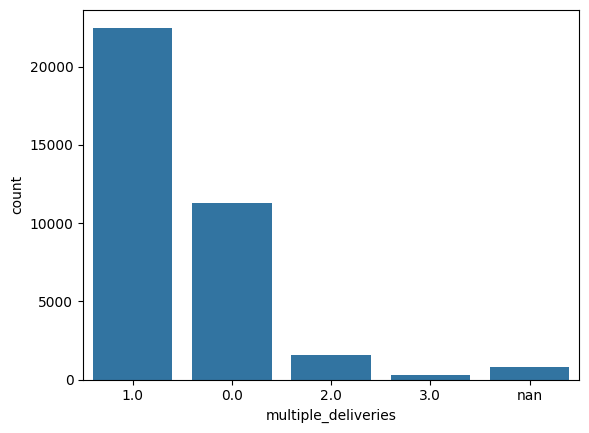

In [176]:
sns.countplot(x=X_train['multiple_deliveries'].apply(str))

**Mode can be used for this column as an imputation technique**

# Festival

In [177]:
X_train['festival'].value_counts()

,count
festival,
no,35474
yes,739


In [178]:
X_train['festival'].isna().sum()

np.int64(188)

<Axes: xlabel='festival', ylabel='count'>

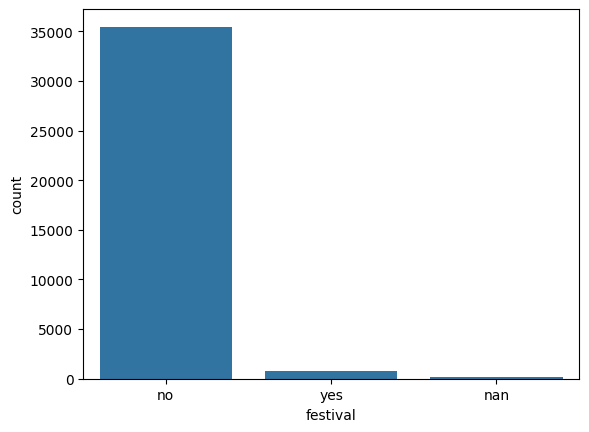

In [179]:
sns.countplot(x=X_train['festival'].apply(str))

In [180]:
festival_mode=X_train['festival'].mode()[0]

<Axes: xlabel='festival', ylabel='count'>

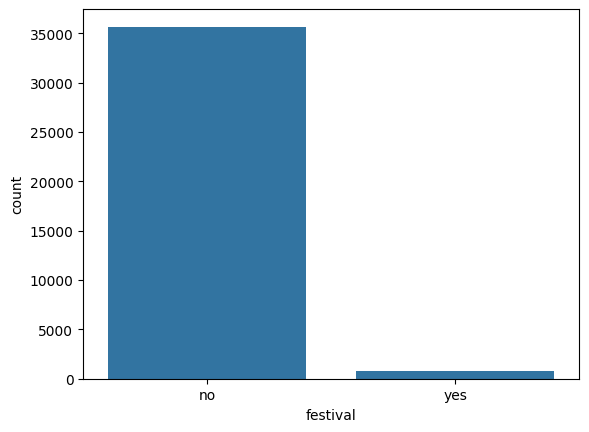

In [181]:
sns.countplot(x=X_train['festival'].fillna(festival_mode))

# City Type

In [182]:
X_train['city_type'].value_counts()

,count
city_type,
metropolitian,27245
urban,8058
semi-urban,130


<Axes: xlabel='city_type', ylabel='count'>

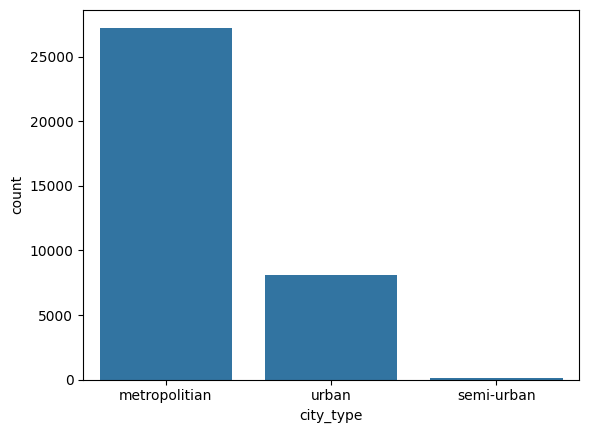

In [183]:
sns.countplot(x=X_train['city_type'])

In [184]:
city_type_mode = X_train['city_type'].mode()[0]

<Axes: xlabel='count', ylabel='city_type'>

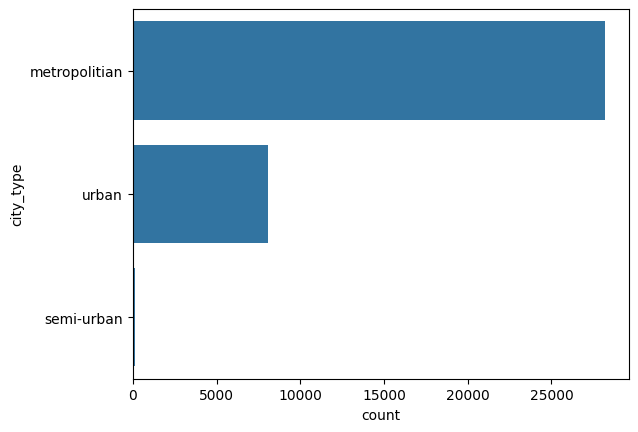

In [185]:
sns.countplot(X_train['city_type'].fillna(city_type_mode))

In [186]:
missing_columns

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'order_time_of_day', 'pickup_time', 'distance',
       'distance_type'],
      dtype='object')

# Pick_up time of Day

In [187]:
X_train['pickup_time'].describe()

,pickup_time
count,35103.000000
mean,9.998718
std,4.082279
min,5.000000
25%,5.000000
50%,10.000000
75%,15.000000
max,15.000000


In [188]:
X_train['pickup_time'].isna().sum()

np.int64(1298)

In [189]:
pickup_time_median = X_train['pickup_time'].median()

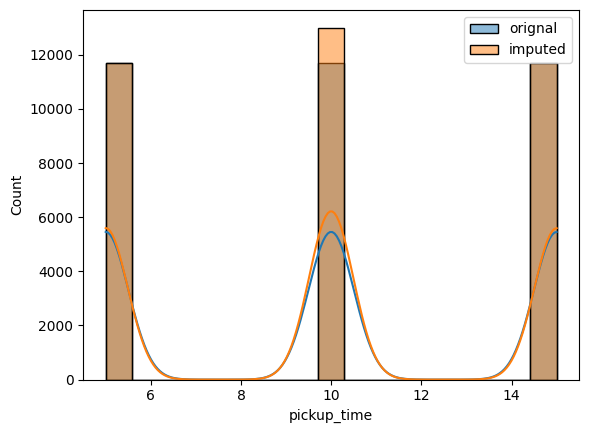

In [190]:
sns.histplot(X_train['pickup_time'],label='orignal',kde=True)
sns.histplot(X_train['pickup_time'].fillna(pickup_time_median),label='imputed',kde=True)
plt.legend()

# Order Time of Day

In [191]:
X_train['order_time_of_day'].value_counts()

,count
order_time_of_day,
night,10994
evening,10906
morning,6883
afternoon,5972


In [192]:
X_train['order_time_of_day'].isna().sum()

np.int64(1646)

<Axes: xlabel='order_time_of_day', ylabel='count'>

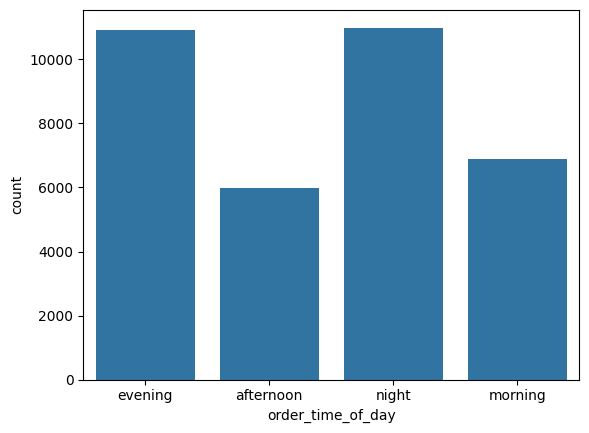

In [193]:
sns.countplot(x=X_train['order_time_of_day'])

# Distance

In [194]:
X_train['distance'].describe()

,distance
count,33470.000000
mean,9.738154
std,5.608401
min,1.465067
25%,4.657672
50%,9.193421
75%,13.681057
max,20.969489


In [195]:
X_train['distance'].isna().sum()

np.int64(2931)

In [196]:
distance_median=X_train['distance'].median()

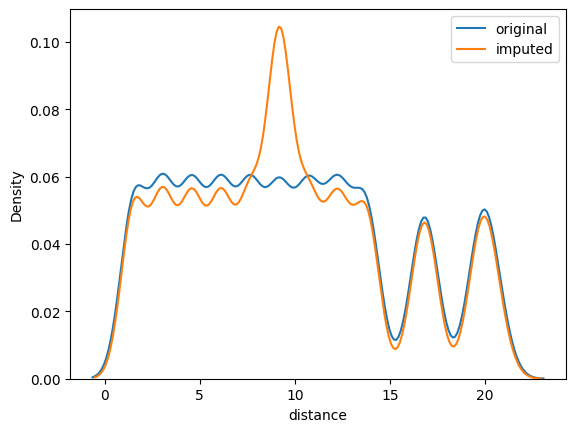

In [197]:
sns.kdeplot(X_train['distance'],label='original')
sns.kdeplot(X_train['distance'].fillna(distance_median),label='imputed')
plt.legend()

# Distance Type

In [198]:
X_train['distance_type'].value_counts()

,count
distance_type,
long,9025
short,8998
medium,8993
very_long,6454


In [199]:
X_train['distance_type'].isna().sum()

np.int64(2931)

<Axes: xlabel='distance_type', ylabel='count'>

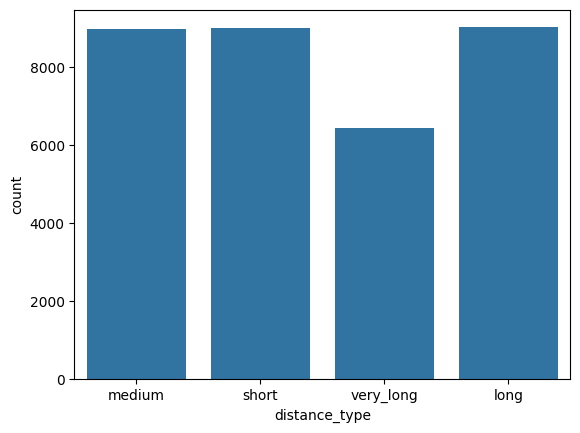

In [200]:
sns.countplot(x=X_train['distance_type'])

**Mode cannot be used here**

# Imputation PipeLine

In [201]:
feature_to_fill_mode=['multiple_deliveries','festival','city_type']
feature_to_fill_missing=[col for col in nominal_cat_cols if col not in feature_to_fill_mode]

In [202]:
feature_to_fill_missing

['weather',
 'type_of_order',
 'type_of_vehicle',
 'city_name',
 'order_month',
 'order_day_of_week',
 'is_weekend',
 'order_time_of_day']

In [203]:
simple_imputer=ColumnTransformer(transformers=[
    ('mode_imputer',SimpleImputer(strategy='most_frequent'),feature_to_fill_mode),
    ('missing_imputer',SimpleImputer(strategy='constant',fill_value='missing'),feature_to_fill_missing)
],remainder='passthrough',n_jobs=1,force_int_remainder_cols=False,verbose_feature_names_out=False)

simple_imputer

ColumnTransformer(force_int_remainder_cols=False, n_jobs=1,
                  remainder='passthrough',
                  transformers=[('mode_imputer',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['multiple_deliveries', 'festival',
                                  'city_type']),
                                ('missing_imputer',
                                 SimpleImputer(fill_value='missing',
                                               strategy='constant'),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'city_name', 'order_month',
                                  'order_day_of_week', 'is_weekend',
                                  'order_time_of_day'])],
                  verbose_feature_names_out=False)

In [204]:
simple_imputer.set_output(transform="pandas")
simple_imputer.fit_transform(X_train).isna().sum().rename('missing_count')

,missing_count
multiple_deliveries,0
festival,0
city_type,0
weather,0
type_of_order,0
type_of_vehicle,0
city_name,0
order_month,0
order_day_of_week,0
is_weekend,0


In [205]:
knn_imputer=KNNImputer(n_neighbors=5)

In [206]:
num_cols=['age','ratings','pickup_time','distance']

nominal_cat_cols = ['weather','type_of_order',
                    'type_of_vehicle',"festival",
                    "city_type","city_name","order_month",
                    "order_day_of_week",
                    "is_weekend",
                    "order_time_of_day"]

ordinal_cat_cols = ["traffic","distance_type"]

In [207]:
# generate order for ordinal encoding

traffic_order = ["low","medium","high","jam"]

distance_type_order = ["short","medium","long","very_long"]

In [208]:
# build a preprocessor
preprocessor = ColumnTransformer(transformers=[
    ("scale", MinMaxScaler(), num_cols),
    ("nominal_encode", OneHotEncoder(drop="first",handle_unknown="ignore",
                                     sparse_output=False), nominal_cat_cols),
    ("ordinal_encode", OrdinalEncoder(categories=[traffic_order,distance_type_order],
                                      handle_unknown="use_encoded_value",
                                      unknown_value=-1), ordinal_cat_cols)
],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)


preprocessor

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time', 'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type', 'city_name',
                                  'order_month', 'order_day_of_week',
                                  'is_weekend', 'order_time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']],
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [209]:
preprocessor

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time', 'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type', 'city_name',
                                  'order_month', 'order_day_of_week',
                                  'is_weekend', 'order_time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']],
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [210]:
preprocessor.set_output(transform="pandas")
preprocessor.fit_transform(X_train)[ordinal_cat_cols]

,traffic,distance_type
11029,3.0,1.0
15665,1.0,1.0
14475,0.0,0.0
29199,1.0,3.0
22514,3.0,1.0
...,...,...
11284,3.0,2.0
44732,0.0,0.0
38158,3.0,-1.0
860,1.0,1.0


In [211]:
preprocessor.fit_transform(X_train).isna().sum().rename('missing_count').loc[lambda ser: ser.ge(1)]

,missing_count
age,1470
ratings,1510
pickup_time,1298
distance,2931
multiple_deliveries,795


In [212]:
# build the PipeLine

processing_pipeline=Pipeline(steps=[
    ('simple_imputer',simple_imputer),
    ('preprocessor',preprocessor),
    ('knn_imputer',knn_imputer)
])

In [213]:
processing_pipeline

Pipeline(steps=[('simple_imputer',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=1,
                                   remainder='passthrough',
                                   transformers=[('mode_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['multiple_deliveries',
                                                   'festival', 'city_type']),
                                                 ('missing_imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant'),
                                                  ['weather', 'type_of_order',
                                                   'type_of_vehic...
                                                   'festival', 'city_type',
                                                   'city_name', 'order_month',
                                                   'order_day_of_week',
                                                   'is_weekend',
                                                   'order_time_of_day']),
                                                 ('ordinal_encode',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high',
                                                                              'jam'],
                                                                             ['short',
                                                                              'medium',
                                                                              'long',
                                                                              'very_long']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['traffic',
                                                   'distance_type'])],
                                   verbose_feature_names_out=False)),
                ('knn_imputer', KNNImputer())])

In [216]:
processing_pipeline.set_output(transform="pandas")

Pipeline(steps=[('simple_imputer',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=1,
                                   remainder='passthrough',
                                   transformers=[('mode_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['multiple_deliveries',
                                                   'festival', 'city_type']),
                                                 ('missing_imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant'),
                                                  ['weather', 'type_of_order',
                                                   'type_of_vehic...
                                                   'festival', 'city_type',
                                                   'city_name', 'order_month',
                                                   'order_day_of_week',
                                                   'is_weekend',
                                                   'order_time_of_day']),
                                                 ('ordinal_encode',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high',
                                                                              'jam'],
                                                                             ['short',
                                                                              'medium',
                                                                              'long',
                                                                              'very_long']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['traffic',
                                                   'distance_type'])],
                                   verbose_feature_names_out=False)),
                ('knn_imputer', KNNImputer())])

In [217]:
processing_pipeline.fit_transform(X_train)

,age,ratings,pickup_time,distance,weather_fog,weather_missing,weather_sandstorms,weather_stormy,weather_sunny,weather_windy,...,order_day_of_week_wednesday,is_weekend_1,order_time_of_day_evening,order_time_of_day_missing,order_time_of_day_morning,order_time_of_day_night,traffic,distance_type,multiple_deliveries,vehicle_condition
11029,0.315789,0.880,0.5,0.395429,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,1.0,2.0
15665,0.052632,0.960,0.0,0.236688,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0
14475,0.536842,0.896,0.5,0.004588,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
29199,0.631579,0.880,1.0,0.993990,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0
22514,0.736842,0.960,0.0,0.389195,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.473684,0.880,0.0,0.563939,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,2.0,0.0,2.0
44732,0.842105,0.920,0.5,0.002839,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
38158,0.842105,0.760,0.5,0.189351,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,-1.0,0.0,1.0
860,0.263158,0.960,0.0,0.322792,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0


In [218]:
lin_reg=LinearRegression()

model_pipe=Pipeline(steps=[
    ('processing_pipeline',processing_pipeline),
    ('lin_reg',lin_reg)
])

model_pipe

Pipeline(steps=[('processing_pipeline',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   ['...
                                                                    'order_day_of_week',
                                                                    'is_weekend',
                                                                    'order_time_of_day']),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('lin_reg', LinearRegression())])

In [219]:
model_pipe.fit(X_train,y_train_pt)

Pipeline(steps=[('processing_pipeline',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   ['...
                                                                    'order_day_of_week',
                                                                    'is_weekend',
                                                                    'order_time_of_day']),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('lin_reg', LinearRegression())])

In [229]:
# get the Prediction

y_pred_train = model_pipe.predict(X_train)
y_pred_test = model_pipe.predict(X_test)

In [230]:
# get the actual predictions values

y_pred_train_actual = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_actual = pt.inverse_transform(y_pred_test.reshape(-1,1))

In [231]:
print(f"The train error is {mean_absolute_error(y_train,y_pred_train_actual):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test,y_pred_test_actual):.2f} minutes")

The train error is 4.83 minutes
The test error is 4.86 minutes


In [242]:
print(f"The train r2 score is {r2_score(y_train,y_pred_train_actual):.2f}")
print(f"The test r2 score is {r2_score(y_test,y_pred_test_actual):.2f}")

The train r2 score is 0.97
The test r2 score is 0.80


**After missing value Imputation, r_2 score has dropped**

In [234]:
from sklearn.ensemble import RandomForestRegressor

r_f=RandomForestRegressor()
model_pipe=Pipeline(steps=[
    ('processing_pipeline',processing_pipeline),
    ('r_forest',r_f)
])

model_pipe

Pipeline(steps=[('processing_pipeline',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   ['...
                                                                    'order_day_of_week',
                                                                    'is_weekend',
                                                                    'order_time_of_day']),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('r_forest', RandomForestRegressor())])

In [235]:
model_pipe.fit(X_train,y_train_pt)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('processing_pipeline',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   ['...
                                                                    'order_day_of_week',
                                                                    'is_weekend',
                                                                    'order_time_of_day']),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('r_forest', RandomForestRegressor())])

In [236]:
# get the Prediction

y_pred_train = model_pipe.predict(X_train)
y_pred_test = model_pipe.predict(X_test)

In [237]:
# get the actual predictions values

y_pred_train_actual = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_actual = pt.inverse_transform(y_pred_test.reshape(-1,1))

In [238]:
print(f"The train error is {mean_absolute_error(y_train,y_pred_train_actual):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test,y_pred_test_actual):.2f} minutes")

The train error is 1.22 minutes
The test error is 3.30 minutes


In [243]:
print(f"The train r2 score is {r2_score(y_train,y_pred_train_actual):.2f}")
print(f"The test r2 score is {r2_score(y_test,y_pred_test_actual):.2f}")

The train r2 score is 0.97
The test r2 score is 0.80
